In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import glob
import os
import seaborn as sns
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import warnings
warnings.filterwarnings("ignore")

In [2]:
input_file = r'C:\Users\김유빈\빅콘\data\01_제공데이터' 

all_file_list = glob.glob(os.path.join(input_file,"*"))
all_file_list

['C:\\Users\\김유빈\\빅콘\\data\\01_제공데이터\\01_음식물쓰레기_FOOD_WASTE_210811_update.CSV',
 'C:\\Users\\김유빈\\빅콘\\data\\01_제공데이터\\02-1_내국인유동인구_KOREAN.CSV',
 'C:\\Users\\김유빈\\빅콘\\data\\01_제공데이터\\02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.CSV',
 'C:\\Users\\김유빈\\빅콘\\data\\01_제공데이터\\02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.CSV',
 'C:\\Users\\김유빈\\빅콘\\data\\01_제공데이터\\03_거주인구_RESIDENT_POP.CSV',
 'C:\\Users\\김유빈\\빅콘\\data\\01_제공데이터\\04_음식관련 카드소비_CARD_SPENDING.CSV']

# 카드 소비 데이터 가공하기
### 문제점
 - 7월 8월 데이터가 없기 때문에 자체적으로 사용하기는 어려움 (비율쓰자)
 - 2018년 1월 1일 배달이 차지하는 비율
 - 1번피처 월_일별비율 =  3월 중에 3월 1일이 차지하는 비율(행정동별)
 - 2번피처 연_월별비율 = 연중에 3월이 차지하는 비율(행정동별)
 - 연중에 목요일이 차지하는 비율(행정동별)
 - 전체 배달 소비량에서 이도1동 배달 소비량이 차지하는 비율

In [3]:
일별_카드 = pd.read_csv(all_file_list[5],encoding="cp949")
일별_카드.columns = ["일자","행정시","행정동코드","행정동명","업종코드","업종명","결제건수","결제금액"]
일별_카드 = 일별_카드.drop(["행정동코드"],axis=1)

In [4]:
weekday = ["월","화","수","목","금","토","일"]
일별_카드["일자"] = pd.to_datetime(일별_카드["일자"],format="%Y-%m-%d")
일별_카드["요일"] = 일별_카드["일자"].apply(lambda x : weekday[x.weekday()])
일별_카드["년"] = 일별_카드["일자"].apply(lambda x : x.year)
일별_카드["월"] = 일별_카드["일자"].apply(lambda x : x.month)
일별_카드["일"] = 일별_카드["일자"].apply(lambda x : x.day)

In [6]:
#일별_카드.to_csv("일별 업종별 카드결제데이터.csv",encoding="utf-8-sig",index=False)

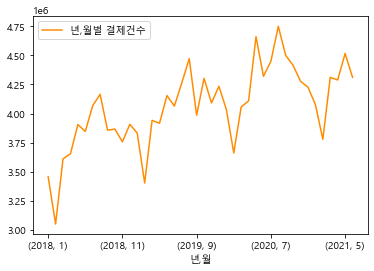

In [36]:
월별_카드 = 일별_카드.groupby(["년","월"]).agg({"결제건수":"sum","결제금액":"sum"})
월별_카드["결제건수"].plot(color="darkorange",label="년,월별 결제건수")
plt.legend()

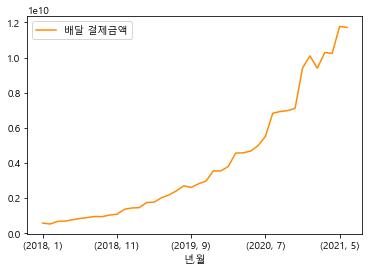

In [30]:
배달 = 일별_카드[일별_카드["업종명"] == "배달"]
연_배달 = 배달.groupby(["년","월"]).agg({"결제건수":"sum","결제금액":"sum"})
연_배달["결제금액"].plot(color="darkorange",label="배달 결제금액")
plt.legend()

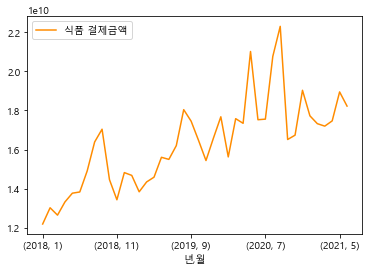

In [41]:
식품 = 일별_카드[일별_카드["업종명"] == "식품"]
연_식품 = 식품.groupby(["년","월"]).agg({"결제건수":"sum","결제금액":"sum"})
연_식품["결제금액"].plot(color="darkorange",label="식품 결제금액")
plt.legend()

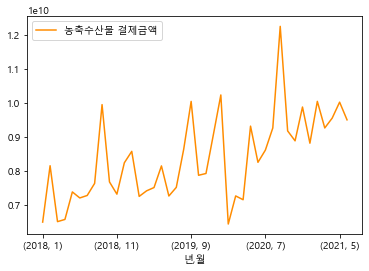

In [45]:
농축수산물 = 일별_카드[일별_카드["업종명"] == "농축수산물"]
농축수산물 = 농축수산물.groupby(["년","월"]).agg({"결제건수":"sum","결제금액":"sum"})
농축수산물["결제금액"].plot(color="darkorange",label="농축수산물 결제금액")
plt.legend()

행정동 결제금액 총합

In [40]:
결제금액건수_총합 = 일별_카드.groupby(["행정동명"]).agg({"결제금액":"sum","결제건수":"sum"}).reset_index()
결제금액건수_총합.head(2)
결제금액건수_총합.to_csv("행정동별 결제금액건수 총합.csv",encoding="utf-8-sig",index=False)

행정동 결제건수 총합

In [ ]:
결제건수_총합 = 일별_카드.groupby(["행정동명"]).agg({"결제건수":"sum"}).reset_index()
결제건수_총합.head(2)

행정동별로 일별 데이터가 충분히 있는지 확인해보기
- 일별로 충분하게 1277개씩 있다

## 일별합
- 연도 무시

In [27]:
일별_합 = 일별_카드.groupby(["월","일","행정시","행정동명"]).agg({"결제건수":"sum","결제금액":"sum"}).reset_index()
일별_합.columns = ['월', '일', '행정시', '행정동명', '일결제건수', '일결제금액']

In [28]:
일별_합[일별_합["행정동명"] == "남원읍"].head(3)

,월,일,행정시,행정동명,일결제건수,일결제금액
0,1,1,서귀포시,남원읍,6497,242972875
45,1,2,서귀포시,남원읍,6705,247921159
90,1,3,서귀포시,남원읍,6777,253307054


## 일평균
- 연도무시

In [314]:
일별_평균 = 일별_카드.groupby(["월","일","행정시","행정동명"]).agg({"결제건수":["mean","std"],"결제금액":["mean","std"]}).reset_index()
일별_평균.columns = ['월', '일', '행정시', '행정동명', '일평균결제건수','일결제건수편차', '일평균결제금액','일결제금액편차']
일별_평균["일평균1회결제금액"] = 일별_평균["일평균결제금액"] / 일별_평균["일평균결제건수"]

In [315]:
일별_평균.head(3)

,월,일,행정시,행정동명,일평균결제건수,일결제건수편차,일평균결제금액,일결제금액편차,일평균1회결제금액
0,1,1,서귀포시,남원읍,154.690476,173.151349,5.785068e+06,7.972394e+06,37397.702786
1,1,1,서귀포시,대륜동,230.282051,288.600885,7.875607e+06,1.224393e+07,34199.831088
2,1,1,서귀포시,대정읍,250.780488,323.451427,8.483105e+06,1.247827e+07,33826.816184


## 월별합
- 연도 무시

In [31]:
월별_합 = 일별_카드.groupby(["월","행정시","행정동명"]).agg({"결제건수":"sum","결제금액":"sum"}).reset_index()
월별_합.columns = ['월','행정시', '행정동명', '월결제건수', '월결제금액']
월별_합[월별_합["행정동명"] == "남원읍"].head(3)

,월,행정시,행정동명,월결제건수,월결제금액
0,1,서귀포시,남원읍,215640,8541732506
45,2,서귀포시,남원읍,188554,7744228208
90,3,서귀포시,남원읍,218005,8552040209


## 월평균
- 연도무시

In [295]:
월별_평균 = 일별_카드.groupby(["월","행정시","행정동명"]).agg({"결제건수":["mean","std"],"결제금액":["mean","std"]}).reset_index()
월별_평균.columns = ['월','행정시', '행정동명', '월평균결제건수', '월결제건수편차','월평균결제금액','월결제금액편차']
월별_평균["월평균1회결제금액"] = 월별_평균["월평균결제금액"] / 월별_평균["월평균결제건수"]
월별_평균[월별_평균["행정동명"] == "남원읍"].head(3)

,월,행정시,행정동명,월평균결제건수,월결제건수편차,월평균결제금액,월결제금액편차,월평균1회결제금액
0,1,서귀포시,남원읍,178.954357,192.936868,7.088575e+06,9.485259e+06,39611.076359
45,2,서귀포시,남원읍,167.902048,187.851411,6.896018e+06,9.756054e+06,41071.672879
90,3,서귀포시,남원읍,175.952381,194.679012,6.902373e+06,9.324794e+06,39228.642504


## 연별평균
- 2021년은 1월부터 6월까지밖에 없으니까 평균으로 해야할듯

In [65]:
연별_평균 = 일별_카드.groupby(["년","행정시","행정동명"]).agg({"결제건수":["mean","std"],"결제금액":["mean","std"]}).reset_index()
연별_평균.columns = ['년','행정시', '행정동명', '연평균결제건수','연결제건수편차', '연평균결제금액','연결제금액편차']
연별_평균["연평균1회결제금액"] = 연별_평균["연평균결제금액"] / 연별_평균["연평균결제건수"]
연별_평균[연별_평균["행정동명"] == "남원읍"].head(3)

,년,행정시,행정동명,연평균결제건수,연결제건수편차,연평균결제금액,연결제금액편차,연평균1회결제금액
0,2018,서귀포시,남원읍,174.851363,201.999318,6.822183e+06,9.367234e+06,39017.042320
45,2019,서귀포시,남원읍,183.288986,207.203127,7.018007e+06,9.452664e+06,38289.301312
90,2020,서귀포시,남원읍,191.960232,206.935970,7.624878e+06,1.018632e+07,39721.134102


## 연별합

In [34]:
연별_합 = 일별_카드.groupby(["년","행정시","행정동명"]).agg({"결제건수":"sum","결제금액":"sum"}).reset_index()
연별_합.columns = ['년','행정시', '행정동명', '연결제건수', '연결제금액']
연별_합.head(3)

,년,행정시,행정동명,연결제건수,연결제금액
0,2018,서귀포시,남원읍,635235,24784990878
1,2018,서귀포시,대륜동,848266,30706055306
2,2018,서귀포시,대정읍,1094664,38323143624


## 연_요일평균
- 연도 무시 x

In [318]:
연_요일별_평균 = 일별_카드.groupby(['년',"요일","행정시","행정동명"]).agg({"결제건수":["mean",'std'],
                                                       "결제금액":["mean",'std']}).reset_index()
연_요일별_평균.columns = ['년','요일','행정시', '행정동명', '연_요일평균결제건수','연_요일결제건수편차' 
                    ,'연_요일평균결제금액','연_요일결제금액편차']
연_요일별_평균["연_요일평균1회결제금액"] = 연_요일별_평균["연_요일평균결제금액"] / 연_요일별_평균["연_요일평균결제건수"]
연_요일별_평균.head(3)

,년,요일,행정시,행정동명,연_요일평균결제건수,연_요일결제건수편차,연_요일평균결제금액,연_요일결제금액편차,연_요일평균1회결제금액
0,2018,금,서귀포시,남원읍,171.675573,198.175767,6.772075e+06,8.897341e+06,39446.934870
1,2018,금,서귀포시,대륜동,228.680233,297.846133,8.208161e+06,1.255881e+07,35893.618988
2,2018,금,서귀포시,대정읍,308.438095,348.879064,1.046317e+07,1.396281e+07,33923.068956


## 월_일별 평균
- 연도 무시

In [323]:
월_일별평균 = 일별_카드.groupby(["월","일","행정시","행정동명"]).agg({"결제건수":["mean","std"],"결제금액":["mean","std"]}).reset_index()
월_일별평균.columns =  ["월",'일', '행정시', '행정동명', '월_일평균결제건수','월_일결제건수편차', '월_일평균결제금액','월_일결제금액편차']
월_일별평균["월_일평균1회결제금액"] = 월_일별평균["월_일평균결제금액"] / 월_일별평균["월_일평균결제건수"]
월_일별평균.head(3)

,월,일,행정시,행정동명,월_일평균결제건수,월_일결제건수편차,월_일평균결제금액,월_일결제금액편차,월_일평균1회결제금액
0,1,1,서귀포시,남원읍,154.690476,173.151349,5.785068e+06,7.972394e+06,37397.702786
1,1,1,서귀포시,대륜동,230.282051,288.600885,7.875607e+06,1.224393e+07,34199.831088
2,1,1,서귀포시,대정읍,250.780488,323.451427,8.483105e+06,1.247827e+07,33826.816184


## 요일별 평균

In [321]:
요일별_평균 = 일별_카드.groupby(["요일","행정시","행정동명"]).agg({"결제건수":["mean",'std'],
                                                       "결제금액":["mean",'std']}).reset_index()
요일별_평균.columns = ['요일','행정시', '행정동명', '요일평균결제건수','요일결제건수편차' ,'요일평균결제금액',
                   '요일결제금액편차']
요일별_평균["요일평균1회결제금액"] = 요일별_평균["요일평균결제금액"] / 요일별_평균["요일평균결제건수"]
요일별_평균.head(3)

,요일,행정시,행정동명,요일평균결제건수,요일결제건수편차,요일평균결제금액,요일결제금액편차,요일평균1회결제금액
0,금,서귀포시,남원읍,183.860186,204.014952,7.368061e+06,9.696814e+06,40074.258810
1,금,서귀포시,대륜동,258.342715,305.503455,8.808436e+06,1.242675e+07,34095.933277
2,금,서귀포시,대정읍,349.045154,377.292331,1.177945e+07,1.463958e+07,33747.651964


### 연요일별합

In [36]:
연요일별_합 = 일별_카드.groupby(["년","요일","행정시","행정동명"]).agg({"결제건수":"sum","결제금액":"sum"}).reset_index()
연요일별_합.columns = ["년",'요일', '행정시', '행정동명', '요일결제건수', '요일결제금액']
연요일별_합[연요일별_합["행정동명"] == "남원읍"].head(3)

,년,요일,행정시,행정동명,요일결제건수,요일결제금액
0,2018,금,서귀포시,남원읍,89958,3548567367
45,2018,목,서귀포시,남원읍,88329,3320341540
90,2018,수,서귀포시,남원읍,90117,3473674168


## 1번 피처 : 월_일별비율
- 월_일별결제건수비율
- 월_일별결제금액비율

In [92]:
def get_월_일별비율(일별_합,월별_합,col1,col2):
    월_일별비율 = pd.merge(일별_합,월별_합,on=["월","행정시","행정동명"],how="left")
    월_일별비율.head()

    월_일별비율["월_일별"+col1+"비율"] = 월_일별비율["일"+col1] / 월_일별비율["월"+col1]
    월_일별비율["월_일별"+col2+"비율"] = 월_일별비율["일"+col2] / 월_일별비율["월"+col2]
    return 월_일별비율[["월","일","행정시","행정동명","월_일별"+col1+"비율","월_일별"+col2+"비율"]]
# 월결제건수 : 1월 남원읍의 총합

In [93]:
월_일별비율 = get_월_일별비율(일별_합,월별_합,"결제건수","결제금액")

In [94]:
월_일별비율

,월,일,행정시,행정동명,월_일별결제건수비율,월_일별결제금액비율
0,1,1,서귀포시,남원읍,0.030129,0.028445
1,1,1,서귀포시,대륜동,0.030410,0.029658
2,1,1,서귀포시,대정읍,0.026596,0.025342
3,1,1,서귀포시,대천동,0.031828,0.033941
4,1,1,서귀포시,동홍동,0.031331,0.033218
...,...,...,...,...,...,...
16465,12,31,제주시,조천읍,0.036260,0.040260
16466,12,31,제주시,추자면,0.027396,0.038202
16467,12,31,제주시,한경면,0.036387,0.042651
16468,12,31,제주시,한림읍,0.036051,0.040905


## 2번 피처 : 연_월별비율
- 연_월별결제건수비율
- 연_월별결제금액비율
- 연도별로 월별 비율을 다르게 가져가야할 것 같다 : 2021 연도무시하고 2018~2020년 데이터로만 만들기

2021년도를 제외한 데이터
- 21년도는 18 ~ 20년도의 평균으로 비율만들기
- 연_월결제금액 : 2021년도 3월의 총 금액
- 월결제금액 : 3월의 총 금액

In [95]:
def get_연_월별비율_1820(일별_카드):
    data = 일별_카드[일별_카드["년"] != 2021].copy()
    # 21년도 제거
    월별_합 = data.groupby(["년","월","행정시","행정동명"]).agg({"결제건수":"sum","결제금액":"sum"}).reset_index()
    월별_합.columns = ["년",'월','행정시', '행정동명', '연_월결제건수', '연_월결제금액']
    
    연별_합 = data.groupby(["년","행정시","행정동명"]).agg({"결제건수":"sum","결제금액":"sum"}).reset_index()
    연별_합.columns = ['년','행정시', '행정동명', '연결제건수', '연결제금액']
    
    연_월별비율 = pd.merge(월별_합,연별_합,on=["년","행정시","행정동명"],how="left")
    
    연_월별비율["연_월결제건수비율"] = 연_월별비율["연_월결제건수"] / 연_월별비율["연결제건수"]
    연_월별비율["연_월결제금액비율"] = 연_월별비율["연_월결제금액"] / 연_월별비율["연결제금액"]
    
    return 연_월별비율[["년","월","행정시","행정동명","연_월결제건수",
                        "연_월결제금액","연_월결제건수비율","연_월결제금액비율"]]

In [96]:
연_월별비율_1820 = get_연_월별비율_1820(일별_카드)
연_월별비율_1820.head(3)

,년,월,행정시,행정동명,연_월결제건수,연_월결제금액,연_월결제건수비율,연_월결제금액비율
0,2018,1,서귀포시,남원읍,49138,1878298705,0.077354,0.075784
1,2018,1,서귀포시,대륜동,65027,2414501385,0.076659,0.078633
2,2018,1,서귀포시,대정읍,80495,2908778634,0.073534,0.075901


2021년도의 연_월별비율 구해보자
- 연_월결제금액 피처 추가하기 : 2021년도 3월의 총 결제 금액

In [97]:
data = 일별_카드[일별_카드["년"] == 2021].copy()
    # 21년도 제거
월별_합_2021 = data.groupby(["년","월","행정시","행정동명"]).agg({"결제건수":"sum","결제금액":"sum"}).reset_index()
월별_합_2021.columns = ["년",'월','행정시', '행정동명', '연_월결제건수', '연_월결제금액']

In [98]:
월별_합_2021.head(3)

,년,월,행정시,행정동명,연_월결제건수,연_월결제금액
0,2021,1,서귀포시,남원읍,58074,2370300682
1,2021,1,서귀포시,대륜동,81093,2667910643
2,2021,1,서귀포시,대정읍,108912,3751035070


In [286]:
연_월별비율_21 = 연_월별비율_1820.groupby(["월","행정시","행정동명"]).agg({"연_월결제건수비율":"mean",
                                               "연_월결제금액비율":"mean"}).reset_index()
연_월별비율_21["년"] = 2021
연_월별비율_21 = pd.merge(월별_합_2021,연_월별비율_21,on=["년","월",
                                            "행정시","행정동명"],how="right")

21년 7월 8월은 마찬가지로 3개년도 평균 쓰기

In [287]:
연_월별비율_21

,년,월,행정시,행정동명,연_월결제건수,연_월결제금액,연_월결제건수비율,연_월결제금액비율
0,2021,1,서귀포시,남원읍,58074.0,2.370301e+09,0.078652,0.078917
1,2021,1,서귀포시,대륜동,81093.0,2.667911e+09,0.077211,0.080527
2,2021,1,서귀포시,대정읍,108912.0,3.751035e+09,0.076317,0.079930
3,2021,1,서귀포시,대천동,82552.0,2.699915e+09,0.075597,0.078656
4,2021,1,서귀포시,동홍동,141595.0,4.731106e+09,0.079639,0.082742
...,...,...,...,...,...,...,...,...
535,2021,12,제주시,조천읍,NaN,NaN,0.085123,0.087472
536,2021,12,제주시,추자면,NaN,NaN,0.079830,0.080006
537,2021,12,제주시,한경면,NaN,NaN,0.082301,0.084932
538,2021,12,제주시,한림읍,NaN,NaN,0.083448,0.083437


### 18~20년도 21년도 합치기
- 연_월별비율_1820과 연_월별비율_21 합치기

In [288]:
연_월별비율 = pd.concat([연_월별비율_1820,연_월별비율_21],axis=0,ignore_index=True)[["년","월","행정시","행정동명",
                                                                     "연_월결제건수비율","연_월결제금액비율"]]

In [289]:
연_월별비율

,년,월,행정시,행정동명,연_월결제건수비율,연_월결제금액비율
0,2018,1,서귀포시,남원읍,0.077354,0.075784
1,2018,1,서귀포시,대륜동,0.076659,0.078633
2,2018,1,서귀포시,대정읍,0.073534,0.075901
3,2018,1,서귀포시,대천동,0.072162,0.072856
4,2018,1,서귀포시,동홍동,0.077615,0.079707
...,...,...,...,...,...,...
2155,2021,12,제주시,조천읍,0.085123,0.087472
2156,2021,12,제주시,추자면,0.079830,0.080006
2157,2021,12,제주시,한경면,0.082301,0.084932
2158,2021,12,제주시,한림읍,0.083448,0.083437


In [74]:
연요일별_합.head(3)

,년,요일,행정시,행정동명,요일결제건수,요일결제금액
0,2018,금,서귀포시,남원읍,89958,3548567367
1,2018,금,서귀포시,대륜동,117999,4235411147
2,2018,금,서귀포시,대정읍,161930,5493162556


## 4번 피처 : 연_요일별비율
- 연_요일별결제건수비율
- 연_요일별결제금액비율


In [107]:
def get_연_요일별비율(연요일별_합,연별_합,col1,col2):
    연_요일별비율 = pd.merge(연요일별_합,연별_합,on=["년","행정시","행정동명"],how="left")

    연_요일별비율["연_요일별"+col1+"비율"] = 연_요일별비율["요일"+col1] / 연_요일별비율["연"+col1]
    연_요일별비율["연_요일별"+col2+"비율"] = 연_요일별비율["요일"+col2] / 연_요일별비율["연"+col2]
    return 연_요일별비율

연_요일별비율 = get_연_요일별비율(연요일별_합,연별_합,"결제건수","결제금액")[["년","요일","행정시","행정동명",
                                                  "연_요일별결제건수비율","연_요일별결제금액비율"]]
연_요일별비율.head(3)

,년,요일,행정시,행정동명,연_요일별결제건수비율,연_요일별결제금액비율
0,2018,금,서귀포시,남원읍,0.141614,0.143174
1,2018,금,서귀포시,대륜동,0.139106,0.137934
2,2018,금,서귀포시,대정읍,0.147927,0.143338


# 업종별로 비율 만들기
- 간단한 EDA 먼저해보기

## 연_월업종비율
- 2020년 3월 중앙동에서 배달, 한식 .. 등이 차지하는 비율

In [231]:
def get_연_월업종비율(일별_카드):
    업종종류 = ['마트/슈퍼마켓', '한식', '식품', '패스트푸드', '간식', '아시아음식', '농축수산물', '배달', '양식',
           '주점및주류판매', '부페']
    
    연_월별 = 일별_카드.groupby(["행정시","행정동명","년","월"]).agg({"결제건수":"sum","결제금액":"sum"}).reset_index()
    연_월별.columns = ["행정시","행정동명","년","월","연_월결제건수","연_월결제금액"]
    
    결과 = [ ]
    for 업종 in 업종종류:
        data = 일별_카드[일별_카드["업종명"] == 업종]
        
        연_월업종별 = data.groupby(["행정시","행정동명","년","월"]).agg({"결제건수":"sum","결제금액":"sum"}).reset_index()
        연_월업종별.columns = ["행정시","행정동명","년","월","연_월결제건수_"+업종,"연_월결제금액_"+업종]
        
        result = pd.merge(연_월업종별,연_월별,on=["행정시","행정동명","년","월"],how="right")
        result["연_월"+업종+"결제건수비율"] = result["연_월결제건수_"+업종] / result["연_월결제건수"]
        result["연_월"+업종+"결제금액비율"] = result["연_월결제금액_"+업종] / result["연_월결제금액"]

        결과.append(result.drop(["연_월결제건수","연_월결제금액"],axis=1))
    결과_merge = 결과[0]
    for i in 결과[1:]:
        결과_merge = pd.merge(결과_merge,i,on=["행정시","행정동명","년","월"],how="inner")
    return 결과_merge.fillna(0)

In [232]:
연_월업종비율 = get_연_월업종비율(일별_카드)

In [303]:
연_월업종비율.head(3)

,행정시,행정동명,년,월,연_월결제건수_마트/슈퍼마켓,연_월결제금액_마트/슈퍼마켓,연_월마트/슈퍼마켓결제건수비율,연_월마트/슈퍼마켓결제금액비율,연_월결제건수_한식,연_월결제금액_한식,...,연_월양식결제건수비율,연_월양식결제금액비율,연_월결제건수_주점및주류판매,연_월결제금액_주점및주류판매,연_월주점및주류판매결제건수비율,연_월주점및주류판매결제금액비율,연_월결제건수_부페,연_월결제금액_부페,연_월부페결제건수비율,연_월부페결제금액비율
0,서귀포시,남원읍,2018,1,13786,700738510,0.280557,0.373071,15412,545929908,...,0.010074,0.009750,255.0,9074662.0,0.005189,0.004831,15.0,836173.0,0.000305,0.000445
1,서귀포시,남원읍,2018,2,12936,725555461,0.306722,0.396451,12379,462634778,...,0.011429,0.009472,214.0,9356037.0,0.005074,0.005112,50.0,2903682.0,0.001186,0.001587
2,서귀포시,남원읍,2018,3,15549,796066086,0.299815,0.391869,16546,578447844,...,0.014172,0.011827,275.0,10858440.0,0.005303,0.005345,60.0,3027768.0,0.001157,0.001490


---------------
배달 비율이 늘어나고 있다는 것 확인할 수 있음

In [ ]:
배달 = 일별_카드[일별_카드["업종명"] == "배달"]
연_월별배달 = 배달.groupby(["행정동명","년","월"]).agg({"결제건수":"sum","결제금액":"sum"}).reset_index()

In [ ]:
연_월별배달.head()

In [ ]:
연_월별배달_중앙동 = 연_월별배달[연_월별배달["행정동명"] == "중앙동"]
연_월별배달_중앙동.columns = ["행정동명","년","월","연_월결제건수_배달","연_월결제금액_배달"]
연_월별배달_중앙동.head()

In [ ]:
연_월별 = 일별_카드.groupby(["행정동명","년","월"]).agg({"결제건수":"sum","결제금액":"sum"}).reset_index()
연_월별.columns = ["행정동명","년","월","연_월결제건수","연_월결제금액"]

연_월별_중앙동 = 연_월별[연_월별["행정동명"] == "중앙동"]
연_월별_중앙동.head()

In [ ]:
result = pd.merge(연_월별배달_중앙동,연_월별_중앙동,on=["행정동명","년","월"],how="inner")
result["비율"] = result["연_월결제건수_배달"] / result["연_월결제건수"]
result

# 요일_업종비율

- 요일별로 업종이 차지하는 비율이 달라질까?
- 일요일날 중앙동에서 배달이 차지하는 비율

In [111]:
def get_요일_업종비율(일별_카드):
    업종종류 = ['마트/슈퍼마켓', '한식', '식품', '패스트푸드', '간식', '아시아음식', '농축수산물', '배달', '양식',
           '주점및주류판매', '부페']
    
    결과 = [ ]
    
    요일통계 = 일별_카드.groupby(["행정시","행정동명","요일"]).agg({"결제건수":"sum","결제금액":"sum"}).reset_index()
    요일통계.columns = ["행정시","행정동명","요일","요일_결제건수","요일_결제금액"]
    
    for 업종 in 업종종류:
        data = 일별_카드[일별_카드["업종명"] == 업종]
        data = data.groupby(["행정시","행정동명","요일"]).agg({"결제건수":"sum","결제금액":"sum"}).reset_index()
        data.columns =  ["행정시","행정동명","요일","요일"+업종+"결제건수","요일"+업종+"결제금액"]
        
        result = pd.merge(data,요일통계,on=["행정시","행정동명","요일"],how="inner")
        result["요일"+업종+"결제건수비율"] = result["요일"+업종+"결제건수"] / result["요일_결제건수"]
        result["요일"+업종+"결제금액비율"] = result["요일"+업종+"결제금액"] / result["요일_결제금액"]
        
        결과.append(result.drop(["요일_결제건수","요일_결제금액"],axis=1))
        
    결과_merge = 결과[0]
    for i in 결과[1:]:
        결과_merge = pd.merge(결과_merge,i,on=["행정시","행정동명","요일"],how="inner")
    return 결과_merge

# 연_요일_업종비율

- 요일별로 업종이 차지하는 비율이 달라질까?
- 2018년 일요일날 중앙동에서 배달이 차지하는 비율
- 요일_업종비율보다 이거 쓰는게 좋을듯
- 결제건이 없는 경우 0으로 만들기

In [210]:
def get_연_요일_업종비율(일별_카드):
    업종종류 = ['마트/슈퍼마켓', '한식', '식품', '패스트푸드', '간식', '아시아음식', '농축수산물', '배달', '양식',
           '주점및주류판매', '부페']
    
    결과 = [ ]
    
    요일통계 = 일별_카드.groupby(["행정시","행정동명","년","요일"]).agg({"결제건수":"sum","결제금액":"sum"}).reset_index()
    요일통계.columns = ["행정시","행정동명","년","요일","요일_결제건수","요일_결제금액"]
    
    for 업종 in 업종종류:
        data = 일별_카드[일별_카드["업종명"] == 업종]
        data = data.groupby(["행정시","행정동명","년","요일"]).agg({"결제건수":"sum","결제금액":"sum"}).reset_index()
        data.columns =  ["행정시","행정동명","년","요일","요일"+업종+"결제건수","요일"+업종+"결제금액"]
        
        result = pd.merge(data,요일통계,on=["행정시","행정동명","년","요일"],how="right")
        result["요일"+업종+"결제건수비율"] = result["요일"+업종+"결제건수"] / result["요일_결제건수"]
        result["요일"+업종+"결제금액비율"] = result["요일"+업종+"결제금액"] / result["요일_결제금액"]
        
        결과.append(result.drop(["요일_결제건수","요일_결제금액"],axis=1))
    결과_merge = 결과[0]
    for i in 결과[1:]:
        결과_merge = pd.merge(결과_merge,i,on=["행정시","행정동명","년","요일"],how="inner")
    return 결과_merge.fillna(0)

In [211]:
연_요일_업종비율 = get_연_요일_업종비율(일별_카드)

# 데이터 전부 결합하기
- 일별_평균
- 월별_평균
- 연별_평균
- 요일별_평균
- 월_일별평균
- 연_요일별 평균
- 월_일별비율
- 연_월별비율
- 연_요일별비율
- 연_월업종비율
- 연_요일_업종비율

### 결합을 위한 기본틀 만들기
- 2018 ~ 2021년 8월
- 모든 행정동 (43개 + 알수없음 제주시 + 알수없음 서귀포시)

In [327]:
일자 = pd.DataFrame(data = pd.date_range("2018-01-01","2021-08-31"),columns=["일자"])
weekday = ["월","화","수","목","금","토","일"]
일자["요일"] = 일자["일자"].apply(lambda x : weekday[x.weekday()])
일자["년"] = 일자["일자"].apply(lambda x : x.year)
일자["월"] = 일자["일자"].apply(lambda x : x.month)
일자["일"] = 일자["일자"].apply(lambda x : x.day)
일자["merge"] = 0

행정시_행정동 = 일별_카드[["행정시","행정동명"]].value_counts().reset_index().drop(0,axis=1)
행정시_행정동["merge"] = 0

결합 = pd.merge(일자,행정시_행정동,on="merge",how="outer").drop("merge",axis=1)

결합이라는 기본틀/

In [340]:
결합1 = pd.merge(결합,일별_평균,on=["월","일","행정시","행정동명"],how="left")
결합2 = pd.merge(결합1,월별_평균,on=["월","행정시","행정동명"],how="left")
결합3 = pd.merge(결합2,연별_평균,on=["년","행정시","행정동명"],how="left")
결합4 = pd.merge(결합3,연_요일별_평균,on=["년","요일","행정시","행정동명"],how="left")
결합5 = pd.merge(결합4,월_일별비율,on=["월","일","행정시","행정동명"],how="left")
결합6 = pd.merge(결합5,연_월별비율,on=["년","월","행정시","행정동명"],how="left")
결합7 = pd.merge(결합6,연_요일별비율,on=["년","요일","행정시","행정동명"],how="left")
결합8 = pd.merge(결합7,연_요일_업종비율,on=["년","요일","행정시","행정동명"],how="left")
결합9 = pd.merge(결합8,연_월업종비율,on=["년","월","행정시","행정동명"],how="left")
결합10 = pd.merge(결합9,요일별_평균,on=["요일","행정시","행정동명"],how="left")
결합11 = pd.merge(결합10,월_일별평균,on=["월","일","행정시","행정동명"],how="left").reset_index(drop=True).sort_values("일자")
# 연_월별비율과 연_월업종비율은 2021년 7월 8월 데이터를 예측하거나 해야함

In [341]:
결합11

,일자,요일,년,월,일,행정시,행정동명,일평균결제건수,일결제건수편차,일평균결제금액,...,요일평균결제건수,요일결제건수편차,요일평균결제금액,요일결제금액편차,요일평균1회결제금액,월_일평균결제건수,월_일결제건수편차,월_일평균결제금액,월_일결제금액편차,월_일평균1회결제금액
0,2018-01-01,월,2018,1,1,제주시,노형동,1238.232558,1576.830363,3.957283e+07,...,1334.821373,1681.938627,3.862395e+07,5.134698e+07,28935.669930,1238.232558,1576.830363,3.957283e+07,5.607867e+07,31959.123075
25,2018-01-01,월,2018,1,1,제주시,구좌읍,154.315789,171.411171,5.132735e+06,...,172.324386,191.689051,5.911026e+06,7.322101e+06,34301.739451,154.315789,171.411171,5.132735e+06,6.277367e+06,33261.245396
26,2018-01-01,월,2018,1,1,서귀포시,안덕면,135.333333,143.657365,4.852279e+06,...,160.043429,173.436820,5.488815e+06,6.959568e+06,34295.783216,135.333333,143.657365,4.852279e+06,6.304498e+06,35854.281925
27,2018-01-01,월,2018,1,1,서귀포시,표선면,111.390244,135.822656,3.954382e+06,...,131.140562,142.894340,4.763347e+06,6.179770e+06,36322.452506,111.390244,135.822656,3.954382e+06,5.634483e+06,35500.254215
28,2018-01-01,월,2018,1,1,서귀포시,성산읍,145.974359,187.779054,4.741893e+06,...,169.277968,206.337923,6.105585e+06,7.966563e+06,36068.397441,145.974359,187.779054,4.741893e+06,6.553331e+06,32484.425083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60227,2021-08-31,화,2021,8,31,제주시,한림읍,313.034483,344.686243,1.197822e+07,...,261.269041,296.040394,9.405557e+06,1.145711e+07,35999.508553,313.034483,344.686243,1.197822e+07,1.630485e+07,38264.845340
60228,2021-08-31,화,2021,8,31,서귀포시,서홍동,240.266667,327.444645,9.159577e+06,...,204.722712,276.473795,7.410198e+06,1.221221e+07,36196.269529,240.266667,327.444645,9.159577e+06,1.591834e+07,38122.544534
60229,2021-08-31,화,2021,8,31,서귀포시,대륜동,288.032258,359.661923,1.009582e+07,...,253.633296,308.645709,8.628524e+06,1.265144e+07,34019.680166,288.032258,359.661923,1.009582e+07,1.507124e+07,35051.002352
60219,2021-08-31,화,2021,8,31,제주시,외도동,570.766667,727.678817,1.717224e+07,...,492.033934,645.177120,1.437415e+07,1.899713e+07,29213.739867,570.766667,727.678817,1.717224e+07,2.175511e+07,30086.264031


In [342]:
결합11.to_csv("카드소비데이터 전처리완료.csv",encoding="utf-8-sig",index=False)

### 간단한 시계열, 회귀모델로 연_월업종비율 예측해줘야할듯

### 결합을 위한 기본틀 만들기
- 2018 ~ 2021년 8월
- 모든 행정동 (43개 + 알수없음 제주시 + 알수없음 서귀포시)

FileNotFoundError: [Errno 2] No such file or directory: '카드소비 비율.csv'

In [352]:
카드소비비율

,일자,요일,년,월,일,행정시,행정동명,일평균결제건수,일결제건수편차,일평균결제금액,...,요일평균결제건수,요일결제건수편차,요일평균결제금액,요일결제금액편차,요일평균1회결제금액,월_일평균결제건수,월_일결제건수편차,월_일평균결제금액,월_일결제금액편차,월_일평균1회결제금액
0,2018-01-01,월,2018,1,1,제주시,노형동,1238.232558,1576.830363,3.957283e+07,...,1334.821373,1681.938627,3.862395e+07,5.134698e+07,28935.669930,1238.232558,1576.830363,3.957283e+07,5.607867e+07,31959.123075
1,2018-01-01,월,2018,1,1,제주시,구좌읍,154.315789,171.411171,5.132735e+06,...,172.324386,191.689051,5.911026e+06,7.322101e+06,34301.739451,154.315789,171.411171,5.132735e+06,6.277367e+06,33261.245396
2,2018-01-01,월,2018,1,1,서귀포시,안덕면,135.333333,143.657365,4.852279e+06,...,160.043429,173.436820,5.488815e+06,6.959568e+06,34295.783216,135.333333,143.657365,4.852279e+06,6.304498e+06,35854.281925
3,2018-01-01,월,2018,1,1,서귀포시,표선면,111.390244,135.822656,3.954382e+06,...,131.140562,142.894340,4.763347e+06,6.179770e+06,36322.452506,111.390244,135.822656,3.954382e+06,5.634483e+06,35500.254215
4,2018-01-01,월,2018,1,1,서귀포시,성산읍,145.974359,187.779054,4.741893e+06,...,169.277968,206.337923,6.105585e+06,7.966563e+06,36068.397441,145.974359,187.779054,4.741893e+06,6.553331e+06,32484.425083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60250,2021-08-31,화,2021,8,31,제주시,한림읍,313.034483,344.686243,1.197822e+07,...,261.269041,296.040394,9.405557e+06,1.145711e+07,35999.508553,313.034483,344.686243,1.197822e+07,1.630485e+07,38264.845340
60251,2021-08-31,화,2021,8,31,서귀포시,서홍동,240.266667,327.444645,9.159577e+06,...,204.722712,276.473795,7.410198e+06,1.221221e+07,36196.269529,240.266667,327.444645,9.159577e+06,1.591834e+07,38122.544534
60252,2021-08-31,화,2021,8,31,서귀포시,대륜동,288.032258,359.661923,1.009582e+07,...,253.633296,308.645709,8.628524e+06,1.265144e+07,34019.680166,288.032258,359.661923,1.009582e+07,1.507124e+07,35051.002352
60253,2021-08-31,화,2021,8,31,제주시,외도동,570.766667,727.678817,1.717224e+07,...,492.033934,645.177120,1.437415e+07,1.899713e+07,29213.739867,570.766667,727.678817,1.717224e+07,2.175511e+07,30086.264031
